<a href="https://colab.research.google.com/github/uervitonsantos/simula-dados-carteira-investimentos/blob/main/Simula_dados_de_opera%C3%A7%C3%B5es_em_cateira_de_investimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo principal desse código é simular uma carteira de investimentos com base em uma estratégia de Buy and Hold, onde um investidor realiza aportes mensais de até R$ 5.000,00 na compra de ações de uma empresa específica ao longo de cinco anos. A cada mês, é registrado no máximo um evento de compra ou venda, sendo que a maior parte dos eventos corresponde a compras, respeitando a ideia de acumular patrimônio ao longo do tempo. As vendas são permitidas apenas em momentos em que o preço do ativo está pelo menos 10% acima da média dos últimos 12 meses, caracterizando uma oportunidade de lucro. As quantidades compradas são ajustadas automaticamente para nunca ultrapassar o valor máximo de aporte mensal. Após gerar os dados simulados, o código também constrói visualizações usando matplotlib e seaborn, como um gráfico de barras horizontais que mostra a quantidade de eventos por produto.

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from datetime import datetime, timedelta

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
## As 5 maiores empresas do Brasil em 2025
PETR4 = "PETR4 - Petroleo Brasileiro SA"
ITUB4 = "ITUB4 - Itaú Unibanco"
VALE3 = "VALE3 - VALE S.A."
WEGE3 = "WEGE3 - WEG S.A."
ABEV3 = "ABEV3 - Ambev"

In [105]:
NUM_EVENTOS = random.randint(50, 60)
ATIVO_NOME = f'{ABEV3}'
MENOR_PRECO = 10.85
MAIOR_PRECO = 19.38
VALOR_APORTE_MAX = 5000.00
PERIODO_ANOS = 5
MESES_TOTAL = PERIODO_ANOS * 12

In [106]:
# Função para gerar um valor formatado como "R$ 0,00"
def format_brl(value):
    return f'R$ {value:,.2f}'.replace('.', '#').replace(',', '.').replace('#', ',')

# Geração de mais de 100 eventos simulados para o ativo selecionado no período de um ano
hoje = datetime.today()
datas_mensais = [hoje - timedelta(days=30 * i) for i in range(MESES_TOTAL)]
datas_mensais = sorted(datas_mensais)[-NUM_EVENTOS:]  # Pegamos as mais recentes
datas_mensais.sort()

In [107]:
# Simulação da carteira
precos_historicos = []
for data in datas_mensais:
    preco = round(random.uniform(MENOR_PRECO, MAIOR_PRECO), 2)
    precos_historicos.append((data, preco))

# Função para média dos últimos 12 meses (antes da data atual)
def calcular_media_12_meses(data_atual, historico):
    inicio = data_atual - timedelta(days=365)
    precos_passados = [preco for data, preco in historico if inicio <= data < data_atual]
    if len(precos_passados) >= 3:  # Pelo menos 3 meses de histórico para evitar ruído
        return sum(precos_passados) / len(precos_passados)
    return None

# Criar eventos
eventos = []
compras = 0
vendas = 0

for i, (data, preco) in enumerate(precos_historicos):
    media_12m = calcular_media_12_meses(data, precos_historicos[:i])  # histórico até mês anterior
    tipo = "Compra"
    pode_vender = media_12m and preco >= 1.10 * media_12m

    if pode_vender and vendas < (NUM_EVENTOS // 7):
        tipo = "Venda"
        quantidade = random.choice([50, 100])
        vendas += 1
    else:
        tipo = "Compra"
        max_qtd = int(VALOR_APORTE_MAX // preco)

        if max_qtd < 1:
            continue  # Nenhuma compra possível esse mês

        # Se puder comprar até 99 ações, sorteia de 1 a max_qtd
        if max_qtd < 100:
            quantidade = random.randint(1, max_qtd)
        else:
            # Se pode comprar 100 ou mais, sorteia múltiplos de 100 até 5000 ou até max_qtd
            opcoes_validas = [q for q in range(100, min(max_qtd, 5000) + 1, 100)]

            # Adiciona possibilidade de comprar de 1 a 99 também (com menor probabilidade)
            if max_qtd >= 1:
                opcoes_validas.extend(range(1, min(max_qtd, 100)))

            quantidade = random.choice(opcoes_validas)

        valor_total = round(preco * quantidade, 2)

        if valor_total > VALOR_APORTE_MAX:
            continue  # Segurança extra, mas em teoria nunca será necessário

        compras += 1

    valor_total = round(preco * quantidade, 2)
    eventos.append([
        tipo,
        data.strftime('%d/%m/%Y'),
        ATIVO_NOME,
        quantidade,
        format_brl(preco),
        format_brl(valor_total)
    ])

In [108]:
# Criação do DataFrame com as colunas especificadas
df = pd.DataFrame(eventos, columns=[
    "Entrada/Saída", "Data", "Produto", "Quantidade", "Preço unitário", "Valor da Operação"
])

print(f"Total de eventos: {len(df)}")
print(f"Compras: {compras} | Vendas: {vendas}")
df.head(10)

Total de eventos: 59
Compras: 51 | Vendas: 8


,Entrada/Saída,Data,Produto,Quantidade,Preço unitário,Valor da Operação
0,Compra,16/09/2020,ABEV3 - Ambev,45,"R$ 17,99","R$ 809,55"
1,Compra,16/10/2020,ABEV3 - Ambev,39,"R$ 14,04","R$ 547,56"
2,Compra,15/11/2020,ABEV3 - Ambev,76,"R$ 14,37","R$ 1.092,12"
3,Venda,15/12/2020,ABEV3 - Ambev,100,"R$ 18,54","R$ 1.854,00"
4,Compra,14/01/2021,ABEV3 - Ambev,78,"R$ 17,43","R$ 1.359,54"
5,Compra,13/02/2021,ABEV3 - Ambev,66,"R$ 14,72","R$ 971,52"
6,Venda,15/03/2021,ABEV3 - Ambev,50,"R$ 19,08","R$ 954,00"
7,Compra,14/04/2021,ABEV3 - Ambev,39,"R$ 15,33","R$ 597,87"
8,Compra,14/05/2021,ABEV3 - Ambev,21,"R$ 17,02","R$ 357,42"
9,Compra,13/06/2021,ABEV3 - Ambev,20,"R$ 17,84","R$ 356,80"


In [109]:
#-----------------------------------------------------------------------------------------
# Esse código garante que se o arquivo não existir, ele será criado com cabeçalhos.
#Se o arquivo já existir, os novos dados serão acrescentados sem duplicar os cabeçalhos.
#-----------------------------------------------------------------------------------------

file_path = '/content/drive/MyDrive/datasets/dados-acoes/carteira-de-ativos.csv'

# Verifica se o arquivo já existe para decidir se deve escrever o cabeçalho
write_header = not os.path.exists(file_path)

# Salvar em CSV no modo append
df.to_csv(file_path, mode='a', header=write_header, index=False)

print("✅ Dados acrescentados em 'carteira-de-ativos.csv'.")

✅ Dados acrescentados em 'carteira-de-ativos.csv'.


In [110]:
df3 = pd.read_csv(f'/content/drive/MyDrive/datasets/dados-acoes/carteira-de-ativos.csv', sep=",")
df3.head(10)

,Entrada/Saída,Data,Produto,Quantidade,Preço unitário,Valor da Operação
0,Compra,15/03/2021,VALE3 - VALE S.A.,8,"R$ 73,02","R$ 584,16"
1,Compra,14/04/2021,VALE3 - VALE S.A.,62,"R$ 54,78","R$ 3.396,36"
2,Compra,14/05/2021,VALE3 - VALE S.A.,4,"R$ 69,01","R$ 276,04"
3,Venda,13/06/2021,VALE3 - VALE S.A.,50,"R$ 86,30","R$ 4.315,00"
4,Venda,13/07/2021,VALE3 - VALE S.A.,50,"R$ 111,37","R$ 5.568,50"
5,Compra,12/08/2021,VALE3 - VALE S.A.,29,"R$ 79,73","R$ 2.312,17"
6,Venda,11/09/2021,VALE3 - VALE S.A.,100,"R$ 92,61","R$ 9.261,00"
7,Venda,11/10/2021,VALE3 - VALE S.A.,100,"R$ 91,77","R$ 9.177,00"
8,Compra,10/11/2021,VALE3 - VALE S.A.,57,"R$ 69,91","R$ 3.984,87"
9,Venda,10/12/2021,VALE3 - VALE S.A.,100,"R$ 111,25","R$ 11.125,00"


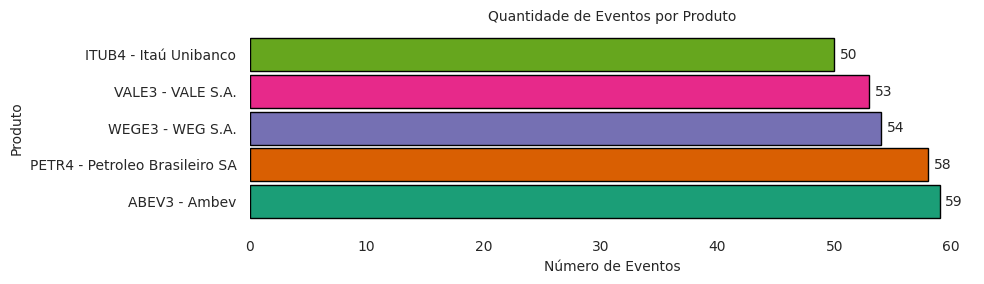

In [126]:
# @title Produto vs Evento

# Estilo limpo
sns.set(style="white")

# Conta os produtos
contagem_produtos = df3['Produto'].value_counts()
n_barras = len(contagem_produtos)

# Ajusta a altura proporcionalmente para deixar as barras coladas
altura = max(3, 0.4 * n_barras)  # Quanto menor o fator (0.4), mais próximas

plt.figure(figsize=(10, altura))

ax = contagem_produtos.plot(
    kind='barh',
    color=sns.color_palette('Dark2', n_barras),
    edgecolor='black',
    width=0.9  # quanto mais perto de 1.0, mais “gordas” e próximas
)

# Rótulos
for i, v in enumerate(contagem_produtos):
    ax.text(v + 0.5, i, str(v), va='center', fontsize=10)

plt.title('Quantidade de Eventos por Produto', fontsize=10)
plt.xlabel('Número de Eventos', fontsize=10)
plt.ylabel('Produto', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove grades e bordas
ax.grid(axis='x', visible=False)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()